# CNN Flores 

## Obtener el tamño de las imagenes

In [ ]:
import cv2 
import numpy as np

img = cv2.imread('C:\\Users\\ocvio\\Downloads\\Tavo\\Tavo\\Gerbera\\foto_227.jpg')
print(img.shape[0], img.shape[1], img.shape[2], len(img.shape))

# Importar Librerias

In [1]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU

# Cargar DataSet Imagenes

In [2]:
dirname = os.path.join(os.getcwd(),'C:\\Users\\ocvio\\Downloads\\Tavo\\Tavo')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                
                images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))



leyendo imagenes de  C:\Users\ocvio\Downloads\Tavo\Tavo\
C:\Users\ocvio\Downloads\Tavo\Tavo\Bugambilia 1
C:\Users\ocvio\Downloads\Tavo\Tavo\Gerbera 9362
C:\Users\ocvio\Downloads\Tavo\Tavo\Lily 9345
C:\Users\ocvio\Downloads\Tavo\Tavo\NocheBuena 7896
C:\Users\ocvio\Downloads\Tavo\Tavo\Orquidea 9683
Directorios leidos: 5
Imagenes en cada directorio [9363, 9345, 7896, 9683, 9100]
suma Total de imagenes en subdirs: 45387


# Creamos las Etiquetas

In [3]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

Cantidad etiquetas creadas:  45387


In [4]:
flores=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    flores.append(name[len(name)-1])
    indice=indice+1

0 Bugambilia
1 Gerbera
2 Lily
3 NocheBuena
4 Orquidea


In [5]:
import numpy as np
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy

# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


# Creamos Set de Entrenamiento y Prueba

In [6]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (36309, 30, 30, 3) (36309,)
Testing data shape :  (9078, 30, 30, 3) (9078,)


Text(0.5, 1.0, 'Ground Truth : 4')

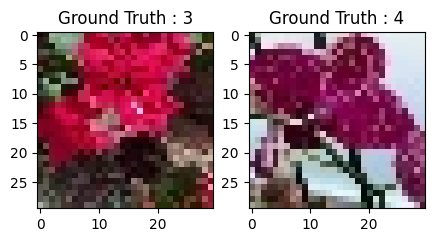

In [7]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las Imagenes

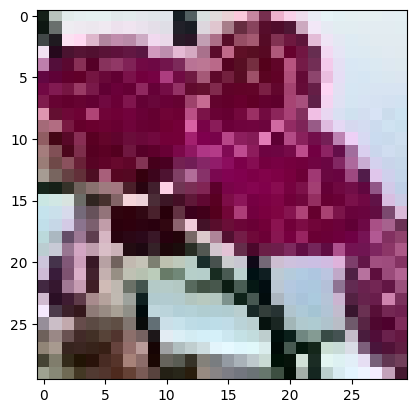

In [8]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

## Hacemos el One-hot Encoding para la red

In [9]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 3
After conversion to one-hot: [0. 0. 0. 1. 0.]


# Creamos el Set de Entrenamiento y Validación

In [10]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [11]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(29047, 30, 30, 3) (7262, 30, 30, 3) (29047, 5) (7262, 5)


# Creamos el modelo CNN

In [12]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 20 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [13]:
flower_model = Sequential()
flower_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(30,30,3)))
flower_model.add(LeakyReLU(alpha=0.1))
flower_model.add(MaxPooling2D((2, 2),padding='same'))
flower_model.add(Dropout(0.5))

#flower_model.add(Conv2D(64, kernel_size=(3, 3), activation='linear', padding='same'))
#flower_model.add(Activation('relu'))
#flower_model.add(MaxPooling2D((2, 2), padding='same'))
#flower_model.add(Dropout(0.5))

#flower_model.add(Conv2D(128, kernel_size=(3, 3), activation='linear', padding='same'))
#flower_model.add(Activation('relu'))
#flower_model.add(MaxPooling2D((2, 2), padding='same'))
#flower_model.add(Dropout(0.5))

flower_model.add(Flatten())
flower_model.add(Dense(32, activation='linear'))
flower_model.add(LeakyReLU(alpha=0.1))
flower_model.add(Dropout(0.5))
flower_model.add(Dense(nClasses, activation='softmax'))

In [14]:
flower_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dense (Dense)               (None, 32)                230432    
                                                        

In [15]:
flower_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

# Entrenamos el Modelo: aprende a clasificar imágenes

In [16]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
flower_train = flower_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20


454/454 [==============================] - 18s 27ms/step - loss: 1.4664 - accuracy: 0.3543 - val_loss: 1.1805 - val_accuracy: 0.7302
Epoch 2/20
454/454 [==============================] - 9s 20ms/step - loss: 1.0980 - accuracy: 0.5961 - val_loss: 0.7776 - val_accuracy: 0.8506
Epoch 3/20
454/454 [==============================] - 9s 20ms/step - loss: 0.8319 - accuracy: 0.7063 - val_loss: 0.5460 - val_accuracy: 0.8814
Epoch 4/20
454/454 [==============================] - 9s 20ms/step - loss: 0.6578 - accuracy: 0.7673 - val_loss: 0.4068 - val_accuracy: 0.9181
Epoch 5/20
454/454 [==============================] - 9s 20ms/step - loss: 0.5452 - accuracy: 0.8102 - val_loss: 0.3197 - val_accuracy: 0.9390
Epoch 6/20
454/454 [==============================] - 9s 21ms/step - loss: 0.4741 - accuracy: 0.8363 - val_loss: 0.2655 - val_accuracy: 0.9463
Epoch 7/20
454/454 [==============================] - 10s 21ms/step - loss: 0.4123 - accuracy: 0.8616 - val_loss: 0.2219 - val_accuracy: 0.

In [17]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
flower_model.save("C:\\Users\\ocvio\\Downloads\\CNNmodel1\\flowers_modelCNN.h5")

c:\Users\ocvio\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Evaluamos la Red

In [18]:
test_eval = flower_model.evaluate(test_X, test_Y_one_hot, verbose=1)

284/284 [==============================] - 1s 3ms/step - loss: 0.0638 - accuracy: 0.9905


In [19]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.06383853405714035
Test accuracy: 0.990526556968689


In [20]:
flower_train.history

{'loss': [1.4664192199707031,
  1.0979859828948975,
  0.8319128155708313,
  0.6577696800231934,
  0.5452407598495483,
  0.47406014800071716,
  0.4122619330883026,
  0.3715492784976959,
  0.33720505237579346,
  0.3013931214809418,
  0.27858051657676697,
  0.26305338740348816,
  0.2440524697303772,
  0.23046979308128357,
  0.21297220885753632,
  0.20728859305381775,
  0.1954643577337265,
  0.18564608693122864,
  0.1764243245124817,
  0.16853289306163788],
 'accuracy': [0.35428789258003235,
  0.5960684418678284,
  0.7062691450119019,
  0.7673425674438477,
  0.8102385997772217,
  0.836334228515625,
  0.8616036176681519,
  0.8745481371879578,
  0.8883877992630005,
  0.9014700055122375,
  0.9101111888885498,
  0.915412962436676,
  0.9229524731636047,
  0.9267738461494446,
  0.9345543384552002,
  0.9356560111045837,
  0.9409921765327454,
  0.9431610703468323,
  0.9467759132385254,
  0.9500464797019958],
 'val_loss': [1.1804622411727905,
  0.7775583863258362,
  0.5459724068641663,
  0.40683743

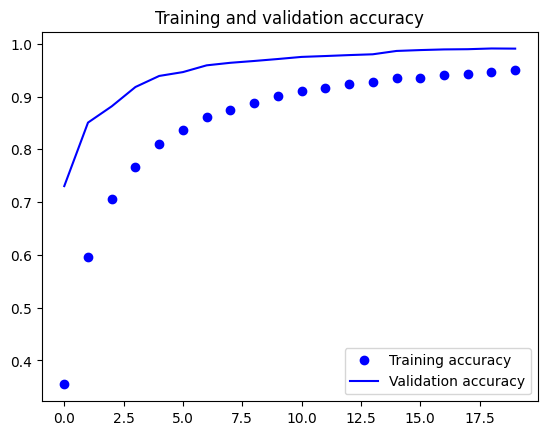

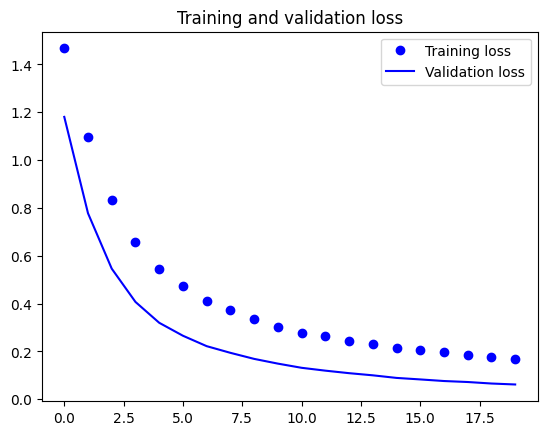

In [21]:
accuracy = flower_train.history['accuracy']
val_accuracy = flower_train.history['val_accuracy']
loss = flower_train.history['loss']
val_loss = flower_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [22]:
predicted_classes2 = flower_model.predict(test_X)

284/284 [==============================] - 1s 3ms/step


In [23]:
predicted_classes=[]
for predicted_flower in predicted_classes2:
    predicted_classes.append(predicted_flower.tolist().index(max(predicted_flower)))
predicted_classes=np.array(predicted_classes)

In [24]:
predicted_classes.shape, test_Y.shape

((9078,), (9078,))

# Aprendamos de los errores: Qué mejorar?

#### Correctos

Found 8992 correct labels


C:\Users\ocvio\AppData\Local\Temp\ipykernel_21376\1582853798.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


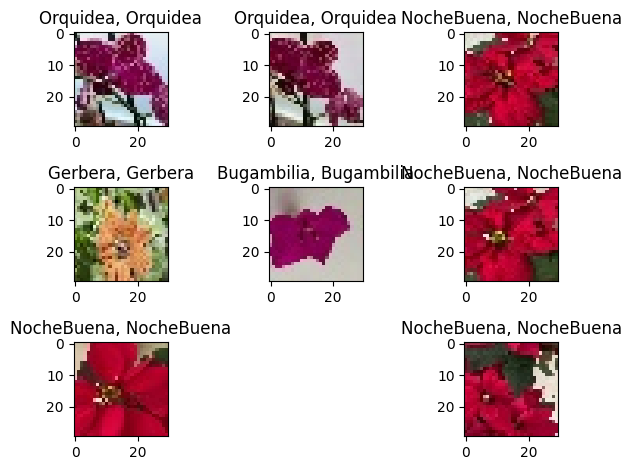

In [25]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(30,30,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(flores[predicted_classes[correct]],
                                                    flores[test_Y[correct]]))

    plt.tight_layout()

#### Incorrectos

Found 86 incorrect labels


C:\Users\ocvio\AppData\Local\Temp\ipykernel_21376\3461492032.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


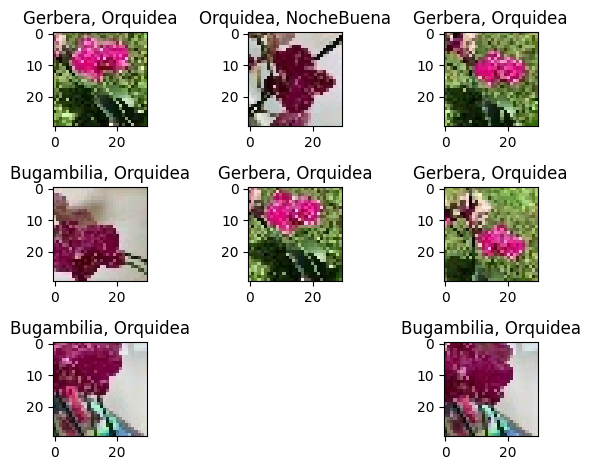

In [26]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(30,30,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(flores[predicted_classes[incorrect]],
                                                    flores[test_Y[incorrect]]))
    plt.tight_layout()

In [27]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.98      1.00      0.99      1867
     Class 1       0.98      1.00      0.99      1869
     Class 2       1.00      0.99      1.00      1600
     Class 3       1.00      0.99      1.00      1892
     Class 4       0.99      0.97      0.98      1850

    accuracy                           0.99      9078
   macro avg       0.99      0.99      0.99      9078
weighted avg       0.99      0.99      0.99      9078



# Predecir una imágen Nueva

In [28]:
from skimage.transform import resize
import numpy as np
import matplotlib.pyplot as plt

# Especifica la ruta de la imagen
filepath = 'C:\\Users\\ocvio\\Downloads\\Tavo\\Tavo\\Bugambilia\\foto_227.jpg'
#"C:\Users\ocvio\Downloads\TestFlores\Bugambilia (2).png"

# Lee la imagen
image = plt.imread(filepath, 0)

# Redimensiona la imagen
image_resized = resize(image, (30, 30), anti_aliasing=True, clip=False, preserve_range=True)

# Convierte la imagen redimensionada a un arreglo numpy
X = np.array([image_resized])

# Realiza la predicción usando el modelo (asegúrate de haber definido 'sport_model' previamente)
predicted_classes = flower_model.predict(X)

# Obtiene la clase predicha para la imagen
predicted_class_index = np.argmax(predicted_classes)

# Imprime la clase predicha
print(f'La imagen {filepath} pertenece a la clase: {flores[predicted_class_index]}')

1/1 [==============================] - 0s 86ms/step
La imagen C:\Users\ocvio\Downloads\Tavo\Tavo\Bugambilia\foto_227.jpg pertenece a la clase: Bugambilia
